In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import fastcluster
import numpy as np

from scipy.stats import pearsonr

In [27]:
import sklearn.linear_model
import statsmodels.api as sm
from scipy import stats
from scipy.stats import zscore

In [2]:
import math

In [6]:
celllines = pd.read_csv("../MCF7_removal/Celllines_mapping_manual_noMCF7.csv")
celllines = celllines.drop_duplicates(subset ="dsIdx")
celllines = celllines[~celllines["CC"].isna()]

In [7]:
doubling_data = []
for row, contents in celllines.iterrows():
    cc = (contents["CC"])
    for item in cc.split("'"):
        if item.startswith("Doub"):
            print(item)
            doubling_data.append([contents["ID"], item])

Doubling time: 85 hours (PubMed=212181); 96 hours (ECACC).
Doubling time: 85 hours (PubMed=212181); 96 hours (ECACC).
Doubling time: 85 hours (PubMed=212181); 96 hours (ECACC).
Doubling time: 85 hours (PubMed=212181); 96 hours (ECACC).
Doubling time: 85 hours (PubMed=212181); 96 hours (ECACC).
Doubling time: 85 hours (PubMed=212181); 96 hours (ECACC).
Doubling time: 46.2 hours (NCI-DTP).
Doubling time: 46.2 hours (NCI-DTP).
Doubling time: 100 hours (PubMed=25984343).
Doubling time: 100 hours (PubMed=25984343).
Doubling time: 46.2 hours (NCI-DTP).
Doubling time: 46.2 hours (NCI-DTP).
Doubling time: 100 hours (PubMed=25984343).
Doubling time: 100 hours (PubMed=25984343).
Doubling time: 100 hours (PubMed=25984343).
Doubling time: 100 hours (PubMed=25984343).
Doubling time: 46.2 hours (NCI-DTP).
Doubling time: 46.2 hours (NCI-DTP).
Doubling time: 40 hours (PubMed=25984343); ~35-60 hours (DSMZ).
Doubling time: 40 hours (PubMed=25984343); ~35-60 hours (DSMZ).
Doubling time: 58 +- 2 hours (Pu

Doubling time: 55 hours (PubMed=25984343).
Doubling time: 55 hours (PubMed=25984343).
Doubling time: 2.8 days (PubMed=9671407).
Doubling time: 2.8 days (PubMed=9671407).
Doubling time: 30 hours (PubMed=25984343).
Doubling time: 30 hours (PubMed=25984343).
Doubling time: 27.1 hours (NCI-DTP); 25 hours (ATCC); ~50 hours (DSMZ); ~25 hours (PBCF); 40 +- 10 hours (CLS).
Doubling time: 27.1 hours (NCI-DTP); 25 hours (ATCC); ~50 hours (DSMZ); ~25 hours (PBCF); 40 +- 10 hours (CLS).
Doubling time: 19.9 hours (PubMed=22628656); 20.5 hours (NCI-DTP).
Doubling time: 19.9 hours (PubMed=22628656); 20.5 hours (NCI-DTP).
Doubling time: 19.9 hours (PubMed=22628656); 20.5 hours (NCI-DTP).
Doubling time: 19.9 hours (PubMed=22628656); 20.5 hours (NCI-DTP).
Doubling time: 4-5 days (lot 09022008) (JCRB).
Doubling time: 4-5 days (lot 09022008) (JCRB).
Doubling time: 1.3 days (PubMed=9671407); 41.9 hours (NCI-DTP); 38 hours (ATCC); ~25-30 hours (DSMZ); ~38 hours (PBCF).
Doubling time: 1.3 days (PubMed=967140

In [8]:
doublingtime_df = pd.DataFrame(doubling_data, columns = ["Cellline", "Doubling Time"])

In [9]:
doublingtime_df = doublingtime_df.drop_duplicates()

In [12]:
doublingtime_values = pd.read_csv("../../Cellosaurus_data/doublingtime.csv")

In [13]:
doublingtime_values["Cellline"] = doublingtime_values["Cellline"].str.replace(" ", "_")

In [14]:
doublingtime_values = doublingtime_values[["Cellline", "NCI-DTP"]]

In [15]:
doublingtime_values = doublingtime_values[~doublingtime_values["NCI-DTP"].isna()]

In [16]:
doublingtime_values = doublingtime_values.set_index("Cellline")

In [30]:
doublingtime_values = doublingtime_values.drop("MCF-7")

In [31]:
avg_celllines = pd.read_csv("./Cell_Line_pathways/Pathway_rankchange_means_celllines.csv")

In [32]:
avg_celllines = avg_celllines.set_index("Pathway")
avg_celllines = avg_celllines.drop(["Unnamed: 0"], axis =1)
avg_celllines.columns = [item.split("label_")[1] for item in avg_celllines.columns]

for column in avg_celllines.columns:
    column = column.replace("_", " ")

In [33]:
avg_celllines_T = avg_celllines.transpose()

In [34]:
combined_data = pd.concat([doublingtime_values, avg_celllines_T], axis =1)

In [35]:
combined_data

,NCI-DTP,Alanine Metabolism,Alpha Linolenic Acid and Linoleic Acid Metabolism,Amino Sugar Metabolism,Ammonia Recycling,Androgen and Estrogen Metabolism,Androstenedione Metabolism,Arachidonic Acid Metabolism,Arginine and Proline Metabolism,Aspartate Metabolism,...,Transfer of Acetyl Groups into Mitochondria,Trehalose Degradation,Tryptophan Metabolism,Tyrosine Metabolism,Ubiquinone Biosynthesis,Urea Cycle,"Valine, Leucine, and Isoleucine Degradation",Vitamin B6 Metabolism,Vitamin K Metabolism,Warburg Effect
LOX-IMVI,20.5,-17.111111,-46.6,-7.80,-24.000000,-1.545455,-11.0000,40.250000,-32.000000,-14.600,...,-13.363636,10.4,-19.045455,-5.250000,-61.50,-4.6250,-15.413043,-17.500000,-62.250,0.166667
HCT_15,20.6,16.666667,-159.7,16.60,11.052632,-24.818182,-11.2500,-36.333333,22.145833,39.450,...,21.090909,1.6,18.659091,-10.464286,5.75,24.1250,38.521739,-9.416667,15.750,22.227273
SW620,20.4,12.888889,-120.6,32.00,17.263158,20.363636,20.8750,-40.083333,40.062500,33.175,...,38.090909,-3.0,33.045455,16.732143,37.25,26.8125,42.086957,7.833333,73.500,51.954545
KM12,23.7,0.555556,-106.4,25.40,2.526316,-29.454545,-21.3750,-12.583333,9.312500,26.625,...,29.000000,-9.8,32.386364,-11.053571,7.75,4.6875,35.391304,11.500000,6.500,5.409091
COLO_205,23.8,-31.888889,31.6,-5.95,-20.000000,11.136364,11.0000,96.166667,-44.229167,-20.100,...,5.818182,-0.2,-24.568182,-29.553571,-75.75,-17.5000,1.586957,0.333333,18.250,-28.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCI-H661,NaN,-44.111111,43.6,9.40,-15.684211,7.727273,21.1250,38.833333,-6.729167,-25.800,...,19.454545,5.8,-21.113636,-50.517857,-0.75,-21.6250,-19.434783,-22.000000,-30.250,-41.166667
HDQ-P1,NaN,-19.444444,346.6,-7.75,-14.157895,-2.181818,-0.6250,-18.666667,-33.729167,-22.700,...,-6.909091,-11.0,-11.113636,-24.517857,20.75,-2.4375,-19.673913,-42.166667,-55.750,-39.227273
BFTC-905,NaN,6.555556,-81.4,7.85,-12.842105,-34.727273,-14.7500,-30.625000,13.354167,13.700,...,12.545455,-2.2,6.386364,-10.392857,-23.75,14.2500,14.630435,-26.500000,2.500,33.075758
HCC1187,NaN,-1.888889,-135.4,-13.75,29.394737,1.045455,-0.5000,1.500000,4.375000,-11.125,...,-32.909091,-16.8,-5.272727,-10.392857,-32.25,9.3125,-16.978261,5.916667,-45.875,-46.606061


In [36]:
pathway_doubling = combined_data[~combined_data["NCI-DTP"].isna()]

In [37]:
pathway_doubling =pathway_doubling.astype(float)

In [49]:
X = (pathway_doubling.drop(["NCI-DTP", "Degradation of Superoxides", "DNA Replication Fork"], axis =1))
Y = pathway_doubling["NCI-DTP"]

In [50]:
df_array = []
Xsubset = X.copy()
for item in Xsubset.columns:
    Xsubset2 = Xsubset[item]
    X2 = sm.add_constant(Xsubset2)
    est = sm.OLS(Y, X2)
    est2 = est.fit()
    results_as_html = est2.summary().tables[1].as_html()
    summary = pd.read_html(results_as_html, header=0, index_col=0)[0]
    df_array.append(summary)

In [51]:
array_concat = pd.concat(df_array)
combined_array = array_concat[~array_concat.index.duplicated(keep='first')]

In [52]:
combined_array_sorted = combined_array.iloc[combined_array["t"].argsort()]

In [54]:
combined_array_sorted.to_csv("regression_comparison_doublingtimevspathways.csv")

In [62]:
doubling_regression_data = combined_array_sorted
doubling_regression_data = doubling_regression_data.drop("const")

In [63]:
doubling_regression_data

,coef,std err,t,P>|t|,[0.025,0.975]
Beta Oxidation of Very Long Chain Fatty Acids,-0.1619,0.053,-3.026,0.004,-0.270,-0.054
Taurine and Hypotaurine Metabolism,-0.0604,0.024,-2.521,0.015,-0.109,-0.012
Phenylacetate Metabolism,-0.0603,0.025,-2.436,0.019,-0.110,-0.010
Steroid Biosynthesis,-0.1431,0.060,-2.387,0.021,-0.264,-0.022
Oxidation of Branched-Chain Fatty Acids,-0.1324,0.062,-2.151,0.037,-0.256,-0.008
...,...,...,...,...,...,...
Alpha Linolenic Acid and Linoleic Acid Metabolism,0.0307,0.020,1.562,0.125,-0.009,0.070
Phosphatidylcholine Biosynthesis,0.0885,0.052,1.716,0.093,-0.015,0.192
Phosphatidylethanolamine Biosynthesis,0.0956,0.051,1.890,0.065,-0.006,0.198
Galactose Metabolism,0.1869,0.088,2.123,0.039,0.010,0.364


In [69]:
doubling_regression_data["-log10p"] = doubling_regression_data["P>|t|"].apply(lambda x: -math.log10(x))

In [70]:
doubling_regression_data_positive = doubling_regression_data[doubling_regression_data["coef"] > 0]
doubling_regression_data_negative = doubling_regression_data[doubling_regression_data["coef"] < 0]

In [71]:
palette_red = sns.light_palette("#D93041", as_cmap = True)
palette_blue = sns.light_palette("#397DAE", as_cmap = True)

In [72]:
doubling_regression_data.to_csv("Regression_doubling_correlation.csv")

C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ds728\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


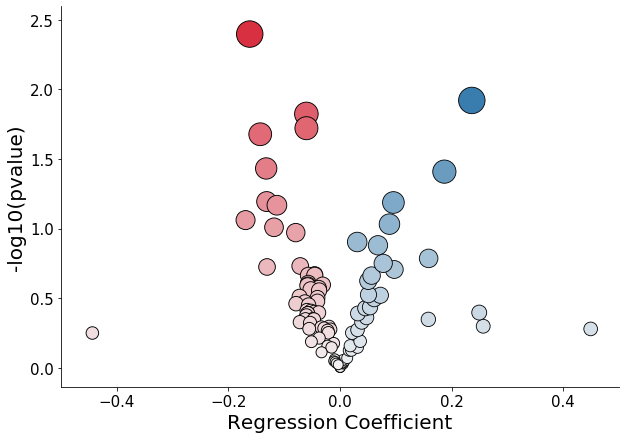

In [74]:
fig, ax = plt.subplots()
g = sns.scatterplot(doubling_regression_data_positive["coef"], doubling_regression_data_positive["-log10p"]
                , size =doubling_regression_data_positive["-log10p"], sizes = (100,700), hue = doubling_regression_data_positive["-log10p"],
                   palette = palette_blue, lw= 1, edgecolor = "k", legend = False)

g2 = sns.scatterplot(doubling_regression_data_negative["coef"], doubling_regression_data_negative["-log10p"]
                , size =doubling_regression_data_negative["-log10p"], sizes = (100,700), hue = doubling_regression_data_negative["-log10p"],
                   palette = palette_red, lw= 1, edgecolor = "k", legend = False)



sns.despine()

g.set_xlim(-0.5, 0.5)
g.set_xlabel("Regression Coefficient", size = 20)
g.set_ylabel("-log10(pvalue)", size = 20)

ax.tick_params(labelsize=15)
#g.set_yticklabels(g.get_yticks(), size=15)
#g.set_xticklabels(g.get_xticks(), size=15)
plt.savefig("Regression_correlation_with_pathways_noMCF7.pdf")